<a href="https://colab.research.google.com/github/toche7/MDS/blob/main/DemographicDataModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load CSV file

### วิธีที่ 1 โหลดไฟล์มาจาก Computer 
แบบนี้จะไม่สะดวกในระยะยาวเพราะทุกครั้งที่โหลดไฟล์จะต้องมีการไปเลือกไฟล์มาตลอด แต่ก็อยากให้ได้ลองทดสอบดู


In [ ]:
# from google.colab import files
# data_to_load = files.upload()

In [ ]:
# data_to_load

In [ ]:
# import io
# df = pd.read_csv(io.BytesIO(data_to_load['DemograhicData.csv']))

In [ ]:
# df.head()

### วิธีที่ 2 โหลดไฟล์ที่อยู่ใน Google Drive  

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# df1 = pd.read_csv('/content/drive/MyDrive/DataDrTaweesakWebsite/MiniDataSci/DATAMining/RapidMiner-Dataset/DemograhicData.csv')
# df1.head()

### วิธีที่ 3 อ่านจาก google sheet
บ่อยครั้งที่เก็บข้อมูลอยู่ใน Google Sheet ดังนั้นเลยคิดว่าน่าจะอ่านจาก google sheet โดยตรงก็จะสะดวกไม่น้อย

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

In [ ]:
gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open('Demographic Data Survey (Responses)')
worksheet = wb.worksheet('Sheet2')



In [ ]:
# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(rows)
df.head()


[['Gender', 'Age', 'Weight', 'Height'], ['F', '25', '39', '156'], ['M', '40', '73', '178'], ['F', '28', '60', '148'], ['F', '27', '53.7', '158'], ['M', '24', '57', '166'], ['M', '50', '107', '182'], ['F', '28', '47', '163'], ['F', '23', '43', '153'], ['M', '33', '81', '173'], ['F', '30', '75', '163'], ['M', '27', '65', '175'], ['F', '35', '60', '160'], ['F', '46', '54', '157'], ['F', '27', '43', '153'], ['F', '34', '67', '163'], ['F', '24', '69', '155'], ['M', '50', '70', '173'], ['F', '38', '57', '155'], ['M', '46', '75', '170'], ['M', '27', '106', '165'], ['F', '26', '72', '162'], ['F', '26', '73.3', '162'], ['F', '44', '68', '160'], ['F', '24', '45', '155'], ['F', '34', '65', '152'], ['F', '27', '45', '155'], ['F', '34', '55', '175'], ['M', '39', '112', '192'], ['M', '26', '72', '174'], ['M', '50', '88', '188'], ['M', '26', '58', '158'], ['M', '40', '88', '180'], ['F', '42', '64', '158'], ['F', '34', '51', '154'], ['F', '32', '50.7', '159'], ['M', '48', '72', '170'], ['F', '30', '80

,0,1,2,3
0,Gender,Age,Weight,Height
1,F,25,39,156
2,M,40,73,178
3,F,28,60,148
4,F,27,53.7,158


In [ ]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df = df.reset_index(drop=True)
df.head()

,Gender,Age,Weight,Height
0,F,25,39,156
1,M,40,73,178
2,F,28,60,148
3,F,27,53.7,158
4,M,24,57,166


In [ ]:
dataPlot = df
dataPlot.tail()
dataPlot.dtypes

0
Gender    object
Age       object
Weight    object
Height    object
dtype: object

In [ ]:
dataPlot['Gender'] = dataPlot['Gender'].astype('category')
dataPlot['Age'] = dataPlot['Age'].astype('int')
dataPlot['Weight'] = dataPlot['Weight'].astype('float')
dataPlot['Height'] = dataPlot['Height'].astype('float')
dataPlot.dtypes

0
Gender    category
Age          int64
Weight     float64
Height     float64
dtype: object

,Gender,Age,Weight,Height
0,F,25,39.0,156.0
1,M,40,73.0,178.0
2,F,28,60.0,148.0
3,F,27,53.7,158.0
4,M,24,57.0,166.0
...,...,...,...,...
88,M,21,84.0,174.0
89,M,21,54.0,166.0
90,M,30,55.0,154.0
91,M,39,90.0,168.0


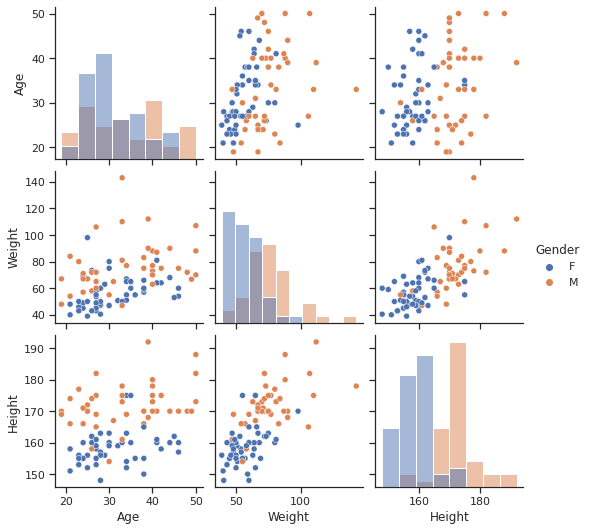

In [ ]:
import seaborn as sns
sns.set_theme(style = 'ticks' ) 
sns.pairplot(dataPlot, hue ='Gender',diag_kind='hist')

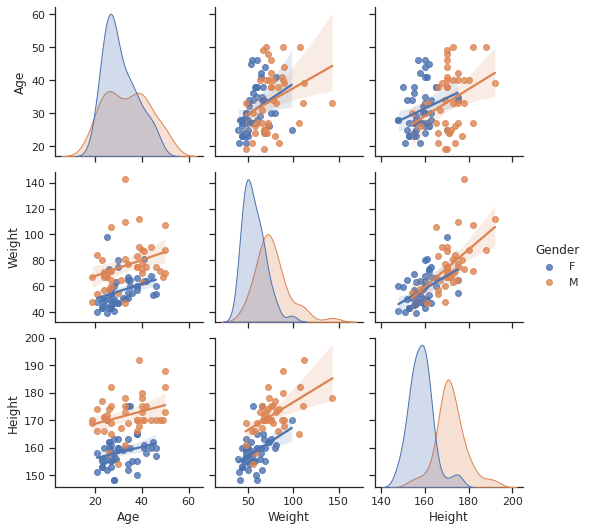

In [ ]:
sns.set_theme(style = 'ticks' ) 
g = sns.pairplot(dataPlot, hue ='Gender',kind='reg')

In [ ]:
type(g)

seaborn.axisgrid.PairGrid

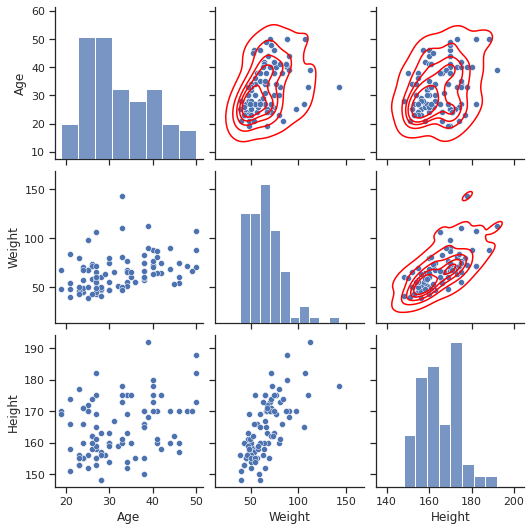

In [ ]:
g = sns.pairplot(dataPlot)
g.map_upper(sns.kdeplot, n_levels=6, color='red');

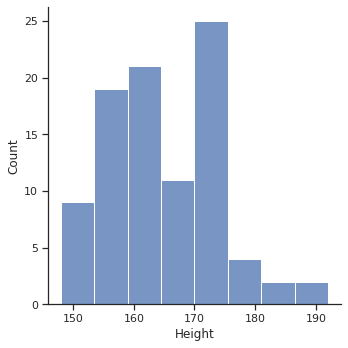

In [ ]:
sns.displot(dataPlot['Height'])

# Regression Analysis 

Coefficients: 
 [1.40889553]
Mean squared error: 182.39
Coefficient of determination: 0.43


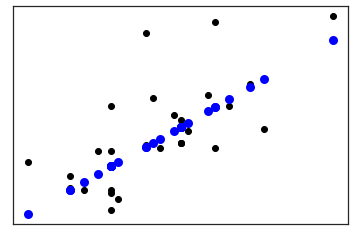

In [ ]:
# Load libraries
from sklearn import linear_model # Import Decision Tree Classifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # Import train_test_split function
import matplotlib.pyplot as plt


feature_cols = ['Height']
X = dataPlot[feature_cols] # Features
y = dataPlot.Weight # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test.Height, y_test,  color='black')
plt.scatter(X_test.Height, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

#Decision Tree

In [ ]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
feature_cols = ['Age',	'Weight',	'Height']
X = dataPlot[feature_cols] # Features
y = dataPlot.Gender # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
 

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8214285714285714


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


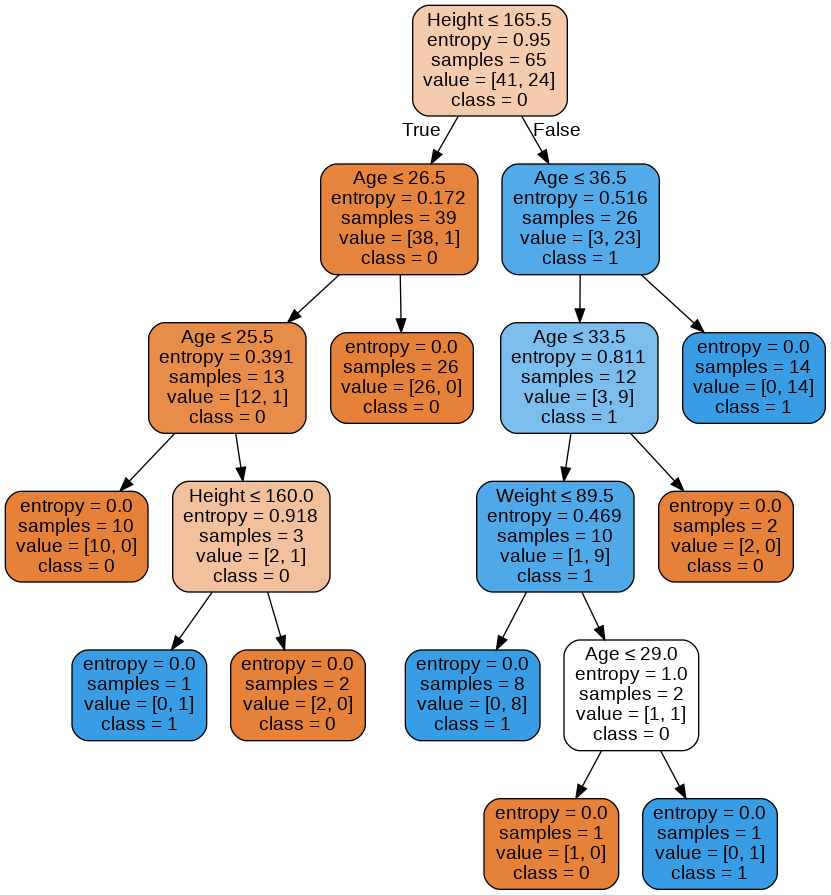

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = generalAttr,class_names=['M','F'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Gradient Boot Tree

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
state = 12  
test_size = 0.30  

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

#XBGoost Classifier 

In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

In [ ]:
score = xgb_clf.score(X_test, y_test)
print(score)